# SETUP

In [1]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('../fusion'))
module_path2 = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

if module_path2 not in sys.path:
    sys.path.append(module_path2)

# Setup Infersent

In [13]:
from embedding_algorithms.inferSent import set_RNN_embedding
start = time.time()
params = {}

model_type = "bilstm" 
char_level = False
model_version = 2
rnn_dim = 1024
verbose = 1
set_RNN_embedding(model_type, char_level, model_version, rnn_dim, verbose)
print("TIME: {0}".format(time.time() - start))

params['embedding'] = {
    'name': 'Infersent',
    'model_type': model_type,
    'char_level': char_level,
    'model_version': model_version,
    'rnn_dim': rnn_dim,
    'verbose': verbose
}

Vocab size : 2196017
TIME: 186.334331035614


# Import dataset

In [14]:
from preprocessing_datasets.preprocessing_book import *
data = set_clean_book()
data

,index,ISBN_10,seller_link,big_cate,author,dirtyAuthor,oldAuthor,title
0,0,0000219118,ground-zero-books%2c-ltd-silver-spring/62893/sf,history-books,"['Association for Asian Studies, Inc']","['association for asian studies, inc']",asian association for inc studies,"The Journal of Asian Studies, Volume 47, Numbe..."
1,1,0000219118,pursuit-of-happiness-books-oakland-ca/81375/sf,history-books,"['The Association for Asian Studies, Inc']","['the association for asian studies, inc']",asian association for inc studies the,The Journal of Asian Studies
2,2,0000788589,archway-books-mana/685127/sf,science-books,"['Pocknall, D. T. And D. C. Mildenhall', 'Pock...","['pocknall, d. t.', 'd. c. mildenhall']",c d mildenhall,Late Oligocene - Early Miocene Spores and Poll...
3,2,0000788589,archway-books-mana/685127/sf,science-books,"['Pocknall, D. T. And D. C. Mildenhall', 'Pock...","['pocknall, d. t.', 'd. c. mildenhall']",d pocknall t,Late Oligocene - Early Miocene Spores and Poll...
4,3,0000788589,arty-bees-books-wellington/6226172/sf,science-books,"['Buckeridge, John Stewart']","['buckeridge, john stewart']",buckeridge john stewart,Fossil Barnacles (Cirripedia: Thoracica) of Ne...
...,...,...,...,...,...,...,...,...
2199026,1891013,9994533150,mark-henderson-olathe-ks-u.s.a/2095040/sf,literature,"['Tanner, Clara Lee']","['tanner, clara lee']",clara lee tanner,Indian Arts and Crafts
2199027,1891014,9994533150,owlsbooks-toledo-md-u.s.a/51218811/sf,literature,['Clara Lee Tanner'],['clara lee tanner'],clara lee tanner,Indian Arts and Crafts
2199028,1891015,9994533150,second-city-books-aurora-il-u.s.a/63477172/sf,literature,"['Tanner, Clara Lee']","['tanner, clara lee']",clara lee tanner,Indian Arts and Crafts
2199029,1891016,9998111552,dogstar-books-lancaster-pa-u.s.a/50869000/sf,history-books,"['Nixon, Richard M.']","['nixon, richard m.']",m nixon richard,RN; The Memoirs of Richard Nixon


## CASE1 - one author

In [15]:
ISBN_10_groups = data.groupby('ISBN_10')
table_ISBN = ISBN_10_groups.get_group('0002258757')

In [16]:
table_ISBN

,index,ISBN_10,seller_link,big_cate,author,dirtyAuthor,oldAuthor,title
8546,7607,0002258757,a-good-read-toronto-on-canada/183177/sf,history-books,"['Cornwell, Bernard']","['cornwell, bernard']",bernard cornwell,Sharpe's Prey Richard Sharpe and the Expeditio...
8547,7608,0002258757,ahbooks-liverpool/1278621/sf,history-books,['Bernard Cornwell'],['bernard cornwell'],bernard cornwell,Sharpe's Prey
8548,7609,0002258757,all-ways-fiction-walnut-ca-u.s.a/364880/sf,history-books,"['Cornwell, Bernard']","['cornwell, bernard']",bernard cornwell,Sharpe's Prey : Richard Sharpe and the Expedit...
8549,7610,0002258757,all-ways-fiction-walnut-ca-u.s.a/364880/sf,literature,"['Cornwell, Bernard']","['cornwell, bernard']",bernard cornwell,Sharpe's Prey : Richard Sharpe and the Expedit...
8550,7611,0002258757,alpha-2-omega-books-ba-southampton/55397992/sf,history-books,"['Cornwell, Bernard']","['cornwell, bernard']",bernard cornwell,Sharpe's Prey
...,...,...,...,...,...,...,...,...
8630,7696,0002258757,tiber-books-cockeysville-md-u.s.a/15035/sf,history-books,"['Cornwell, Bernard.']","['cornwell, bernard.']",bernard cornwell,Sharpe's Prey: Richard Sharpe and the Expediti...
8631,7697,0002258757,tobo-books-portsmouth/60358271/sf,history-books,"['Cornwell, Bernard']","['cornwell, bernard']",bernard cornwell,Sharpe's Prey : Richard Sharpe and the Expedit...
8632,7698,0002258757,treasured-books-ltd-warrington/52660807/sf,history-books,"['Cornwell, Bernard']","['cornwell, bernard']",bernard cornwell,Sharpe's Prey : Richard Sharpe and the Expedit...
8633,7699,0002258757,worldofbooks-goring-by-sea/51947087/sf,history-books,"['Cornwell, Bernard']","['cornwell, bernard']",bernard cornwell,Sharpe's Prey


In [17]:
table_ISBN['oldAuthor'].value_counts()

bernard cornwell    86
ellis peters         3
Name: oldAuthor, dtype: int64

In [28]:
column = table_ISBN['oldAuthor'].tolist()
column

['bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwell',
 'ellis peters',
 'bernard cornwell',
 'bernard cornwell',
 'bernard cornwel

In [18]:
from embedding_algorithms.inferSent import RNN_embedding
attr_list = ['big_cate', 'oldAuthor', 'title']
params['attr_list'] = attr_list
embeddings_tokens = RNN_embedding(table_ISBN, attr_list, model_type, char_level)
embeddings_tokens = np.array(embeddings_tokens)

attrs: ['big_cate', 'oldAuthor', 'title']


In [38]:
from dimensionality_reduction_algorithms.tsne import tsne_dim_reduction
tsne_embeddings = tsne_dim_reduction(
    embeddings_tokens, 
    num_components=2,
    early_exaggeration=12,
    verbose=1,
    perplexity=10,
    method="barnes_hut")

params['reduction'] = {
    'name': 'TSNE',
    'num_components': 2,
    'early_exaggeration': 12,
    'verbose': 1,
    'perplexity': 10,
    'method': "barnes_hut"
}

starting dimension: 2048
setting TSNE with n_components: 2 & perplexity: 10
early_exaggeration: 12


rows: 89
classes: 89


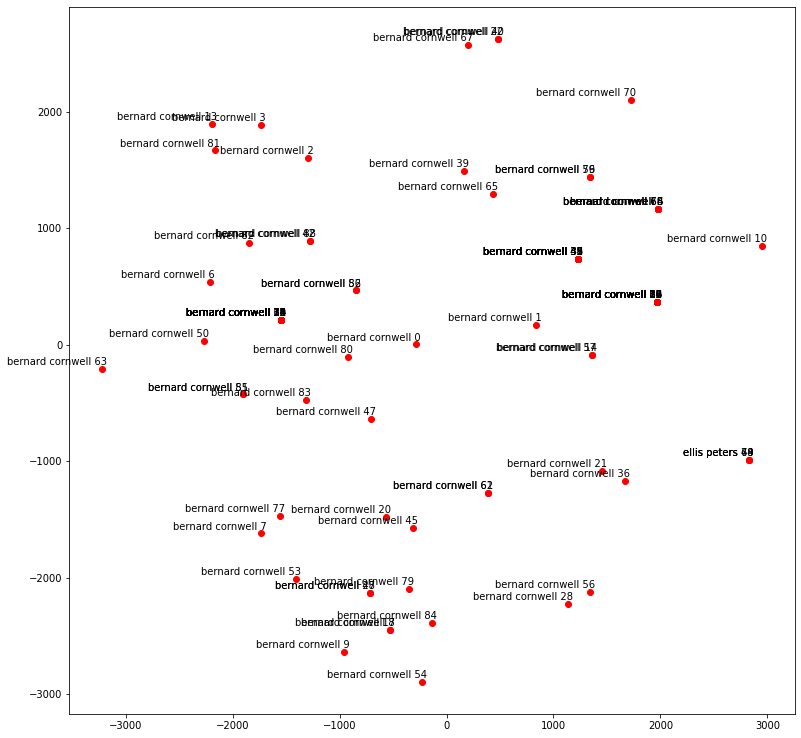

In [39]:
x = []
y = []
for emb in tsne_embeddings:
    x.append(emb[0])
    y.append(emb[1])

print("rows: {0}".format(len(x)))
print("classes: {0}".format(len(y)))

plt.figure(figsize=(13, 13)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],c='red')
    plt.annotate(column[i] + ' ' + str(i),
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
plt.show()

In [49]:
from cluster_algorithms.hierarchy_cluster import hierarchy_cluster
num_clusters = 5
blocks = hierarchy_cluster(tsne_embeddings, {'num_clusters': num_clusters})

params['blocking'] = {
    'name': 'hierarchy',
    'num_clusters': num_clusters
}

clustering with NUM_CLUSTERS = 5, 


In [56]:
print(blocks)
print()
for index in blocks:
    print(len(blocks[index]))

{0: [0, 2, 3, 6, 12, 13, 18, 19, 23, 24, 33, 34, 35, 42, 47, 50, 51, 52, 60, 63, 71, 72, 73, 74, 80, 81, 82, 83, 85, 86, 88], 1: [1, 4, 5, 10, 11, 14, 15, 16, 25, 26, 29, 30, 31, 32, 37, 38, 41, 43, 46, 49, 55, 57, 58, 59, 64, 66, 68, 70, 75, 76, 87], 2: [7, 8, 9, 17, 20, 27, 45, 48, 53, 54, 61, 62, 77, 79, 84], 3: [21, 28, 36, 44, 56, 69, 78], 4: [22, 39, 40, 65, 67]}

31
31
15
7
5


In [51]:
import random
def random_color(n):
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    step = 256 / n
    r += step
    g += step
    b += step
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    return r,g,b

def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

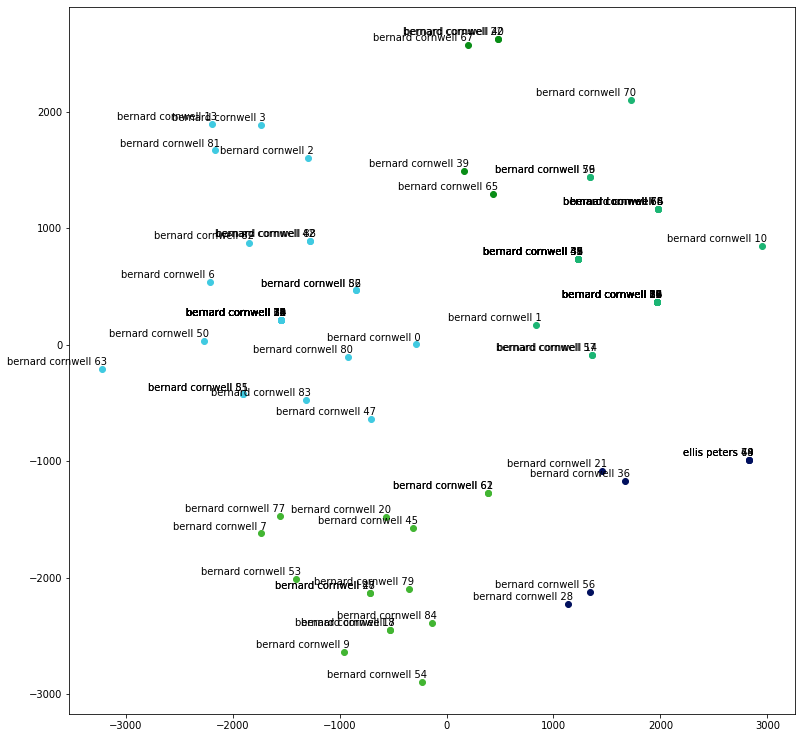

In [52]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 

for i in range(num_clusters):
    colorInit = 1 + i
    r, g, b = random_color(colorInit)
    selected_color = rgb2hex(r,g,b)
    block = blocks[i]
    for e in block:
        plt.scatter(x[e],y[e], c=selected_color)
        plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

## CASE2 - one author

In [58]:
ISBN_10_groups = data.groupby('ISBN_10')
table_ISBN = ISBN_10_groups.get_group('0030169364')
table_ISBN['oldAuthor'].value_counts()

brown dee              78
alexander brown dee    27
brown de                1
Name: oldAuthor, dtype: int64

In [59]:
column = table_ISBN['oldAuthor'].tolist()

In [60]:
from embedding_algorithms.inferSent import RNN_embedding
attr_list = ['big_cate', 'oldAuthor', 'title']
params['attr_list'] = attr_list
embeddings_tokens = RNN_embedding(table_ISBN, attr_list, model_type, char_level)
embeddings_tokens = np.array(embeddings_tokens)

attrs: ['big_cate', 'oldAuthor', 'title']


In [61]:
from dimensionality_reduction_algorithms.tsne import tsne_dim_reduction
tsne_embeddings = tsne_dim_reduction(
    embeddings_tokens, 
    num_components=2,
    early_exaggeration=12,
    verbose=1,
    perplexity=10,
    method="barnes_hut")

params['reduction'] = {
    'name': 'TSNE',
    'num_components': 2,
    'early_exaggeration': 12,
    'verbose': 1,
    'perplexity': 10,
    'method': "barnes_hut"
}

starting dimension: 2048
setting TSNE with n_components: 2 & perplexity: 10
early_exaggeration: 12


rows: 106
classes: 106


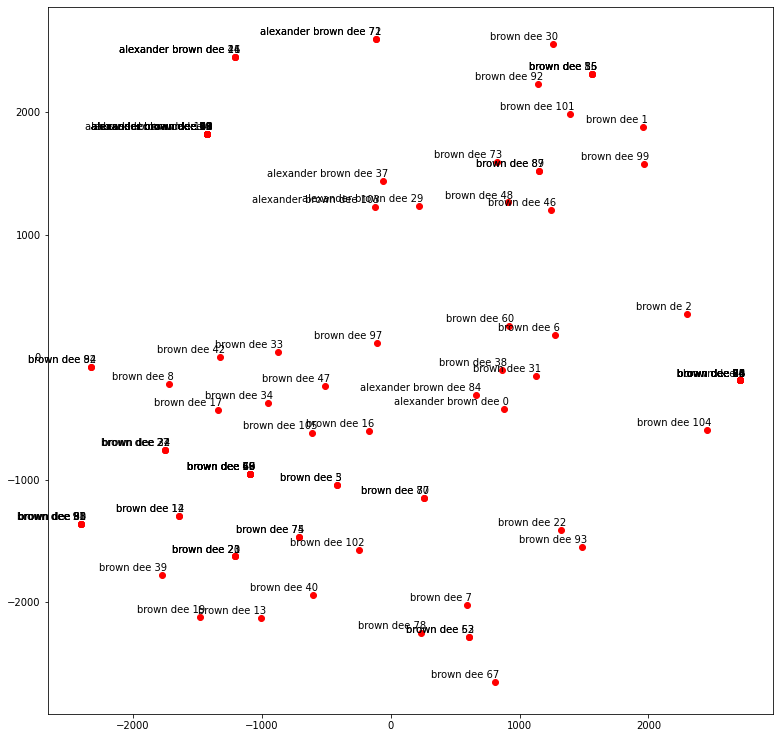

In [62]:
x = []
y = []
for emb in tsne_embeddings:
    x.append(emb[0])
    y.append(emb[1])

print("rows: {0}".format(len(x)))
print("classes: {0}".format(len(y)))

plt.figure(figsize=(13, 13)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],c='red')
    plt.annotate(column[i] + ' ' + str(i),
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
plt.show()

In [63]:
from cluster_algorithms.hierarchy_cluster import hierarchy_cluster
num_clusters = 5
blocks = hierarchy_cluster(tsne_embeddings, {'num_clusters': num_clusters})

params['blocking'] = {
    'name': 'hierarchy',
    'num_clusters': num_clusters
}

clustering with NUM_CLUSTERS = 5, 


In [66]:
print(blocks)
print()
for index in blocks:
    print("index: {0} - {1}".format(index, len(blocks[index])))

{2: [0, 2, 4, 6, 25, 28, 31, 38, 41, 50, 54, 60, 64, 76, 84, 85, 95, 104], 3: [1, 15, 30, 35, 46, 48, 55, 73, 86, 87, 89, 92, 99, 101], 0: [3, 5, 8, 12, 13, 14, 16, 17, 19, 20, 21, 23, 24, 27, 32, 33, 34, 39, 40, 42, 45, 47, 57, 59, 66, 68, 69, 70, 74, 75, 77, 80, 81, 82, 83, 88, 90, 91, 94, 97, 102, 105], 4: [7, 22, 53, 62, 67, 78, 93], 1: [9, 10, 11, 18, 26, 29, 36, 37, 43, 44, 49, 51, 52, 56, 58, 61, 63, 65, 71, 72, 79, 96, 98, 100, 103]}

index: 2 - 18
index: 3 - 14
index: 0 - 42
index: 4 - 7
index: 1 - 25


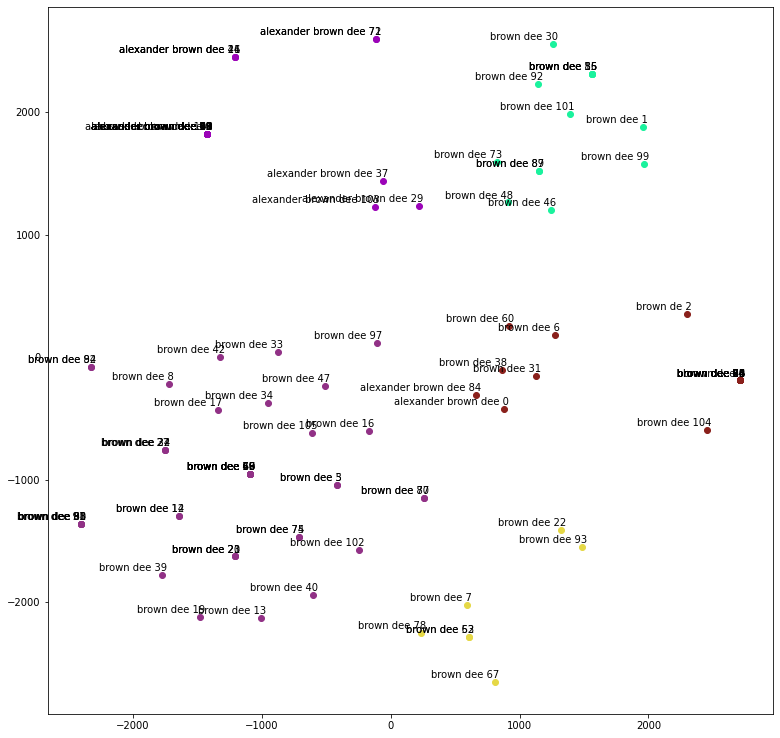

In [67]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 

for i in range(num_clusters):
    colorInit = 1 + i
    r, g, b = random_color(colorInit)
    selected_color = rgb2hex(r,g,b)
    block = blocks[i]
    for e in block:
        plt.scatter(x[e],y[e], c=selected_color)
        plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

42


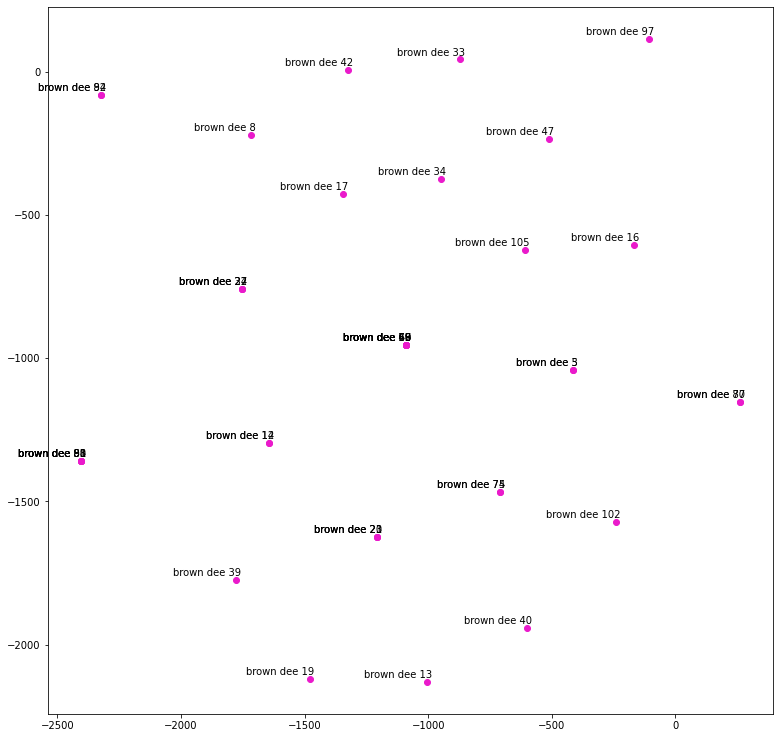

In [69]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 


r, g, b = random_color(1)
selected_color = rgb2hex(r,g,b)
block = blocks[0]
print(len(block))
for e in block:
    plt.scatter(x[e],y[e], c=selected_color)
    plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

## CASE3 - two authors

In [70]:
ISBN_10_groups = data.groupby('ISBN_10')
table_ISBN = ISBN_10_groups.get_group('0060190078')
table_ISBN['oldAuthor'].value_counts()

larry rivers        80
arnold weinstein    71
larry rivers w       1
Name: oldAuthor, dtype: int64

In [71]:
column = table_ISBN['oldAuthor'].tolist()

from embedding_algorithms.inferSent import RNN_embedding
attr_list = ['big_cate', 'oldAuthor', 'title']
params['attr_list'] = attr_list
embeddings_tokens = RNN_embedding(table_ISBN, attr_list, model_type, char_level)
embeddings_tokens = np.array(embeddings_tokens)

attrs: ['big_cate', 'oldAuthor', 'title']


starting dimension: 2048
setting TSNE with n_components: 2 & perplexity: 10
early_exaggeration: 12
rows: 152
classes: 152


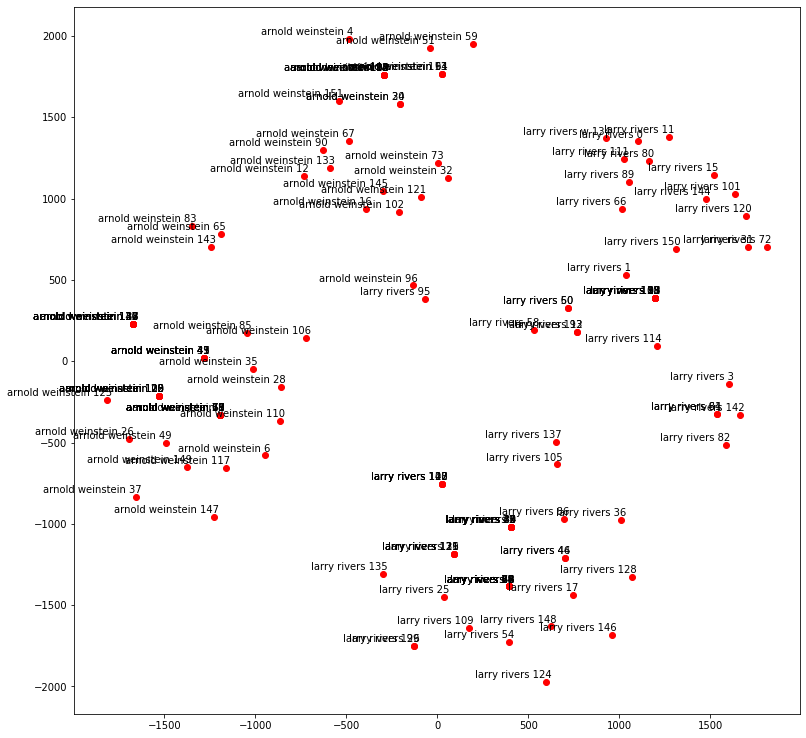

In [72]:
from dimensionality_reduction_algorithms.tsne import tsne_dim_reduction
tsne_embeddings = tsne_dim_reduction(
    embeddings_tokens, 
    num_components=2,
    early_exaggeration=12,
    verbose=1,
    perplexity=10,
    method="barnes_hut")

params['reduction'] = {
    'name': 'TSNE',
    'num_components': 2,
    'early_exaggeration': 12,
    'verbose': 1,
    'perplexity': 10,
    'method': "barnes_hut"
}

x = []
y = []
for emb in tsne_embeddings:
    x.append(emb[0])
    y.append(emb[1])

print("rows: {0}".format(len(x)))
print("classes: {0}".format(len(y)))

plt.figure(figsize=(13, 13)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],c='red')
    plt.annotate(column[i] + ' ' + str(i),
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
plt.show()

In [73]:
from cluster_algorithms.hierarchy_cluster import hierarchy_cluster
num_clusters = 5
blocks = hierarchy_cluster(tsne_embeddings, {'num_clusters': num_clusters})

params['blocking'] = {
    'name': 'hierarchy',
    'num_clusters': num_clusters
}

print(blocks)
print()
for index in blocks:
    print("index: {0} - {1}".format(index, len(blocks[index])))

clustering with NUM_CLUSTERS = 5, 
{4: [0, 11, 15, 31, 66, 72, 80, 89, 101, 111, 120, 134, 144], 3: [1, 3, 13, 23, 29, 50, 58, 60, 64, 81, 82, 88, 91, 93, 97, 103, 112, 114, 115, 138, 142, 150], 0: [2, 4, 12, 14, 16, 24, 30, 32, 51, 59, 61, 67, 73, 90, 92, 94, 95, 96, 98, 102, 104, 113, 121, 133, 139, 145, 151], 2: [5, 7, 9, 17, 19, 21, 25, 27, 33, 34, 36, 38, 40, 42, 44, 46, 48, 52, 54, 56, 62, 68, 70, 74, 76, 78, 84, 86, 99, 105, 107, 109, 116, 118, 122, 124, 126, 128, 129, 131, 135, 137, 140, 146, 148], 1: [6, 8, 10, 18, 20, 22, 26, 28, 35, 37, 39, 41, 43, 45, 47, 49, 53, 55, 57, 63, 65, 69, 71, 75, 77, 79, 83, 85, 87, 100, 106, 108, 110, 117, 119, 123, 125, 127, 130, 132, 136, 141, 143, 147, 149]}

index: 4 - 13
index: 3 - 22
index: 0 - 27
index: 2 - 45
index: 1 - 45


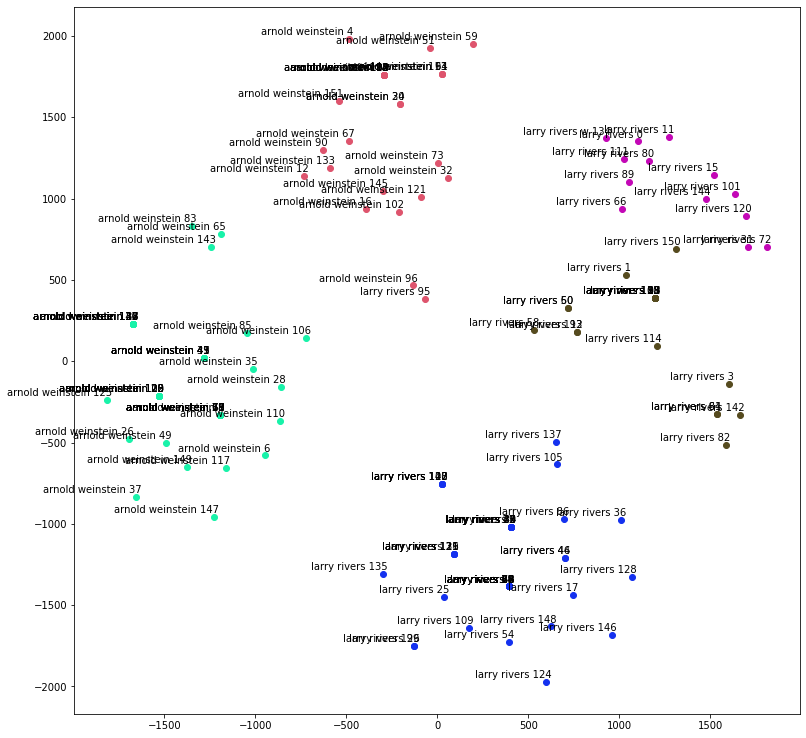

In [74]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 

for i in range(num_clusters):
    colorInit = 1 + i
    r, g, b = random_color(colorInit)
    selected_color = rgb2hex(r,g,b)
    block = blocks[i]
    for e in block:
        plt.scatter(x[e],y[e], c=selected_color)
        plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

45


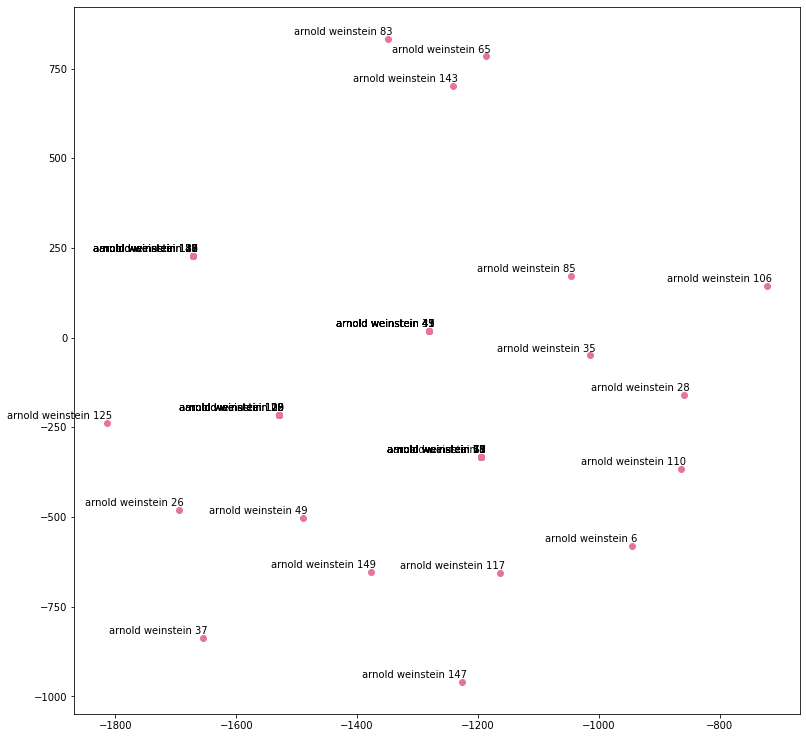

In [75]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 


r, g, b = random_color(1)
selected_color = rgb2hex(r,g,b)
block = blocks[1]
print(len(block))
for e in block:
    plt.scatter(x[e],y[e], c=selected_color)
    plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

45


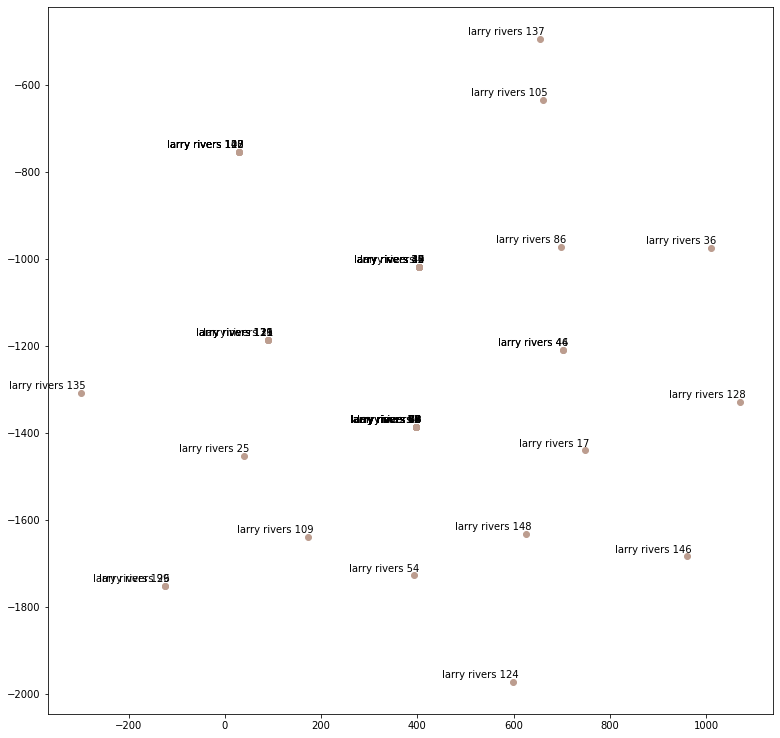

In [76]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 


r, g, b = random_color(1)
selected_color = rgb2hex(r,g,b)
block = blocks[2]
print(len(block))
for e in block:
    plt.scatter(x[e],y[e], c=selected_color)
    plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

## CASE3 - three authors

In [77]:
ISBN_10_groups = data.groupby('ISBN_10')
table_ISBN = ISBN_10_groups.get_group('0062701789')
table_ISBN['oldAuthor'].value_counts()

earl woods                  73
mcdaniel pete               23
tiger woods                 10
earl mcdaniel woods~pete     1
earl w woods                 1
foreword tiger woods         1
Name: oldAuthor, dtype: int64

In [78]:
column = table_ISBN['oldAuthor'].tolist()

from embedding_algorithms.inferSent import RNN_embedding
attr_list = ['big_cate', 'oldAuthor', 'title']
params['attr_list'] = attr_list
embeddings_tokens = RNN_embedding(table_ISBN, attr_list, model_type, char_level)
embeddings_tokens = np.array(embeddings_tokens)

attrs: ['big_cate', 'oldAuthor', 'title']


starting dimension: 2048
setting TSNE with n_components: 2 & perplexity: 10
early_exaggeration: 12
rows: 109
classes: 109


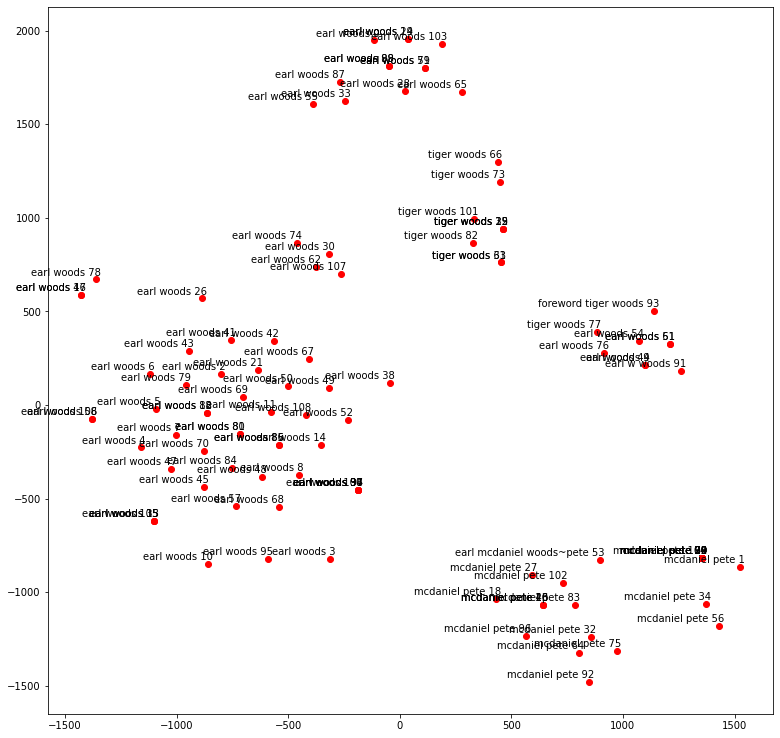

In [79]:
from dimensionality_reduction_algorithms.tsne import tsne_dim_reduction
tsne_embeddings = tsne_dim_reduction(
    embeddings_tokens, 
    num_components=2,
    early_exaggeration=12,
    verbose=1,
    perplexity=10,
    method="barnes_hut")

params['reduction'] = {
    'name': 'TSNE',
    'num_components': 2,
    'early_exaggeration': 12,
    'verbose': 1,
    'perplexity': 10,
    'method': "barnes_hut"
}

x = []
y = []
for emb in tsne_embeddings:
    x.append(emb[0])
    y.append(emb[1])

print("rows: {0}".format(len(x)))
print("classes: {0}".format(len(y)))

plt.figure(figsize=(13, 13)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],c='red')
    plt.annotate(column[i] + ' ' + str(i),
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
plt.show()

In [80]:
from cluster_algorithms.hierarchy_cluster import hierarchy_cluster
num_clusters = 5
blocks = hierarchy_cluster(tsne_embeddings, {'num_clusters': num_clusters})

params['blocking'] = {
    'name': 'hierarchy',
    'num_clusters': num_clusters
}

print(blocks)
print()
for index in blocks:
    print("index: {0} - {1}".format(index, len(blocks[index])))

clustering with NUM_CLUSTERS = 5, 
{3: [0, 19, 24, 28, 33, 55, 59, 65, 71, 87, 89, 98, 103], 1: [1, 16, 18, 20, 23, 25, 27, 29, 32, 34, 40, 53, 56, 60, 64, 72, 75, 83, 90, 92, 96, 99, 102, 104], 2: [2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 21, 35, 36, 37, 38, 43, 45, 47, 48, 49, 50, 52, 57, 58, 67, 68, 69, 70, 79, 80, 81, 84, 85, 86, 88, 94, 95, 97, 100, 105, 106, 108], 0: [9, 15, 22, 31, 39, 44, 51, 54, 61, 63, 66, 73, 76, 77, 82, 91, 93, 101], 4: [17, 26, 30, 41, 42, 46, 62, 74, 78, 107]}

index: 3 - 13
index: 1 - 24
index: 2 - 44
index: 0 - 18
index: 4 - 10


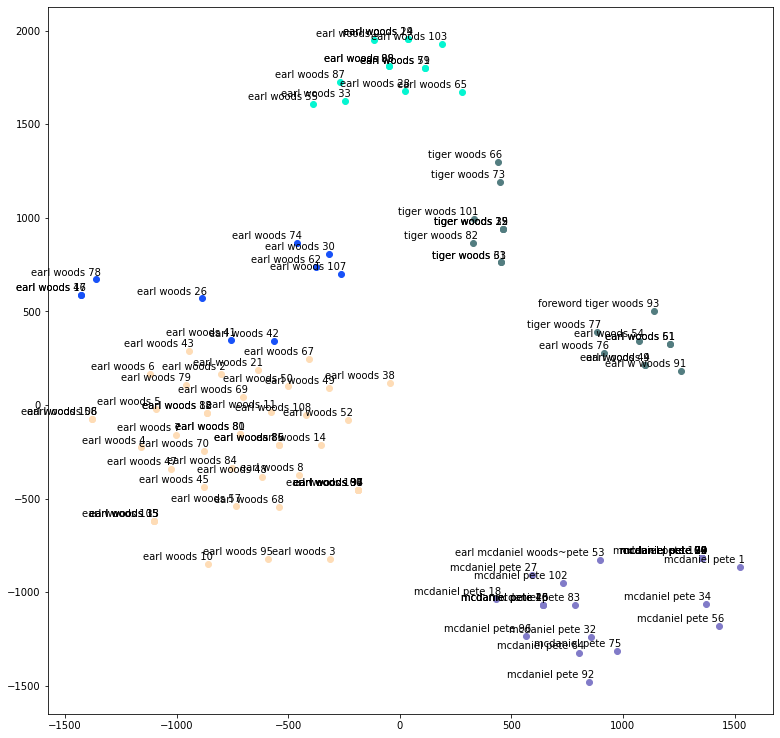

In [81]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 

for i in range(num_clusters):
    colorInit = 1 + i
    r, g, b = random_color(colorInit)
    selected_color = rgb2hex(r,g,b)
    block = blocks[i]
    for e in block:
        plt.scatter(x[e],y[e], c=selected_color)
        plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

44


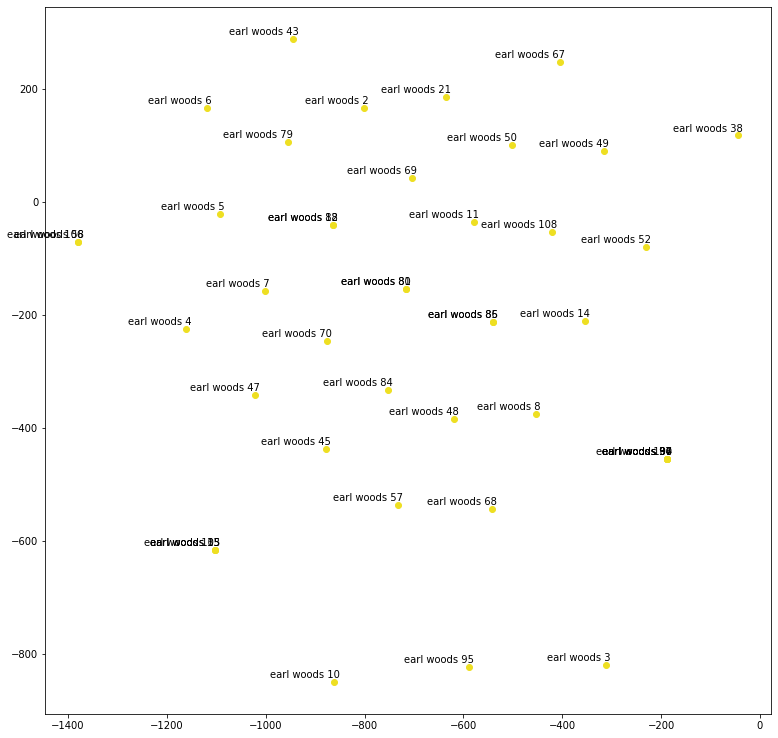

In [82]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 


r, g, b = random_color(1)
selected_color = rgb2hex(r,g,b)
block = blocks[2]
print(len(block))
for e in block:
    plt.scatter(x[e],y[e], c=selected_color)
    plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

24


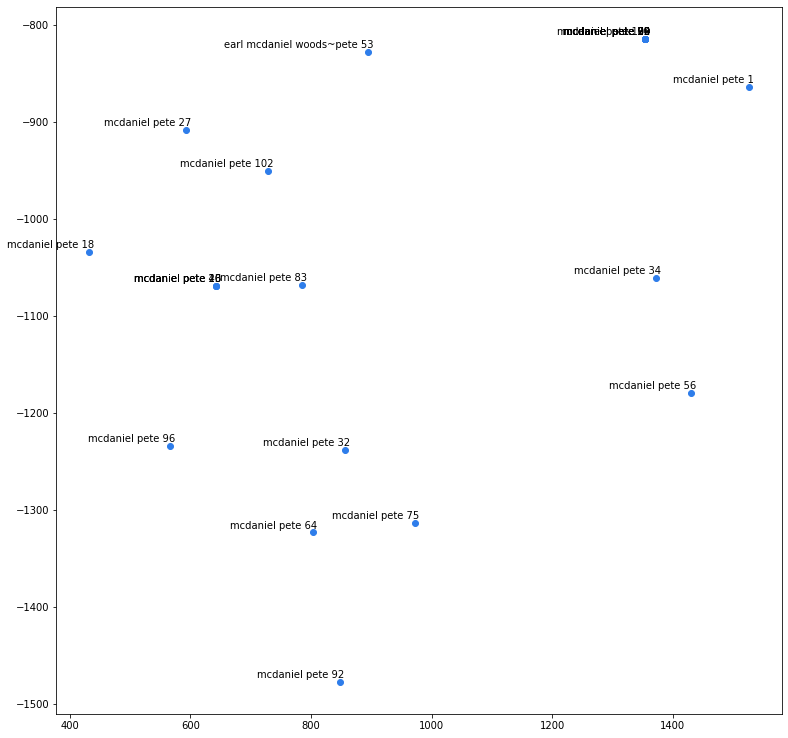

In [83]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 


r, g, b = random_color(1)
selected_color = rgb2hex(r,g,b)
block = blocks[1]
print(len(block))
for e in block:
    plt.scatter(x[e],y[e], c=selected_color)
    plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

18


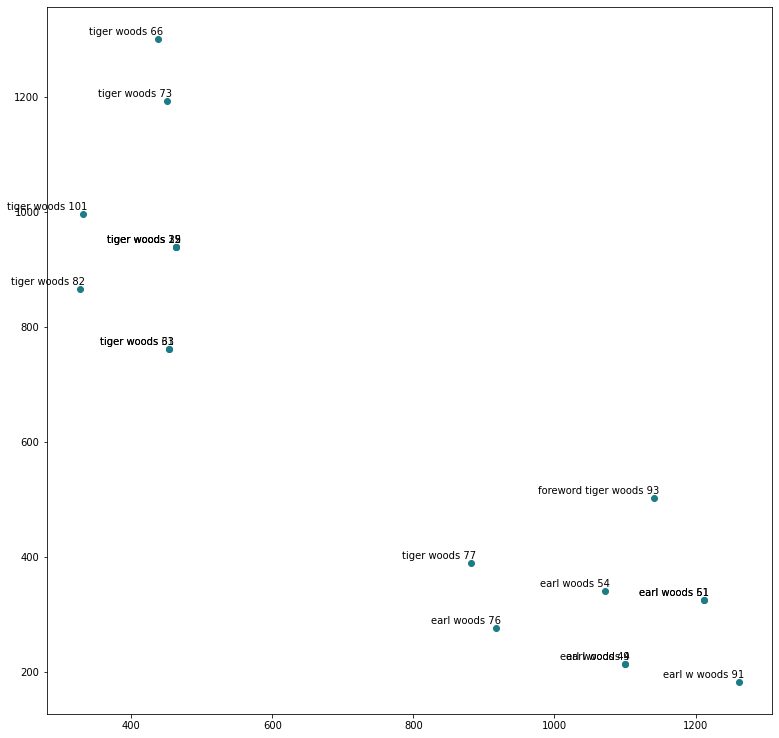

In [84]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 


r, g, b = random_color(1)
selected_color = rgb2hex(r,g,b)
block = blocks[0]
print(len(block))
for e in block:
    plt.scatter(x[e],y[e], c=selected_color)
    plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

## CASE3 - three authors

In [85]:
ISBN_10_groups = data.groupby('ISBN_10')
table_ISBN = ISBN_10_groups.get_group('026272006X')
table_ISBN['oldAuthor'].value_counts()

robert venturi                                    56
izenour steven                                    41
brown denise scott                                39
venturi                                            6
izenour robert venturi                             3
br denise scott                                    1
brown izenourdenise robert scott venturisteven     1
azenour steven                                     1
Name: oldAuthor, dtype: int64

In [86]:
column = table_ISBN['oldAuthor'].tolist()

from embedding_algorithms.inferSent import RNN_embedding
attr_list = ['big_cate', 'oldAuthor', 'title']
params['attr_list'] = attr_list
embeddings_tokens = RNN_embedding(table_ISBN, attr_list, model_type, char_level)
embeddings_tokens = np.array(embeddings_tokens)

attrs: ['big_cate', 'oldAuthor', 'title']


starting dimension: 2048
setting TSNE with n_components: 2 & perplexity: 10
early_exaggeration: 12
rows: 148
classes: 148


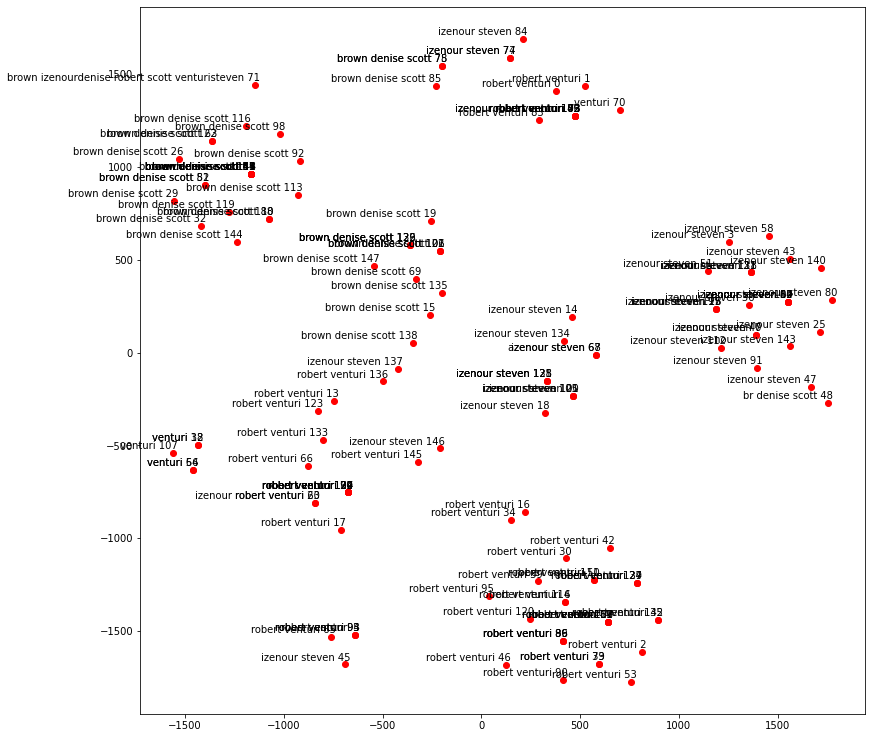

In [87]:
from dimensionality_reduction_algorithms.tsne import tsne_dim_reduction
tsne_embeddings = tsne_dim_reduction(
    embeddings_tokens, 
    num_components=2,
    early_exaggeration=12,
    verbose=1,
    perplexity=10,
    method="barnes_hut")

params['reduction'] = {
    'name': 'TSNE',
    'num_components': 2,
    'early_exaggeration': 12,
    'verbose': 1,
    'perplexity': 10,
    'method': "barnes_hut"
}

x = []
y = []
for emb in tsne_embeddings:
    x.append(emb[0])
    y.append(emb[1])

print("rows: {0}".format(len(x)))
print("classes: {0}".format(len(y)))

plt.figure(figsize=(13, 13)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],c='red')
    plt.annotate(column[i] + ' ' + str(i),
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
plt.show()

In [88]:
from cluster_algorithms.hierarchy_cluster import hierarchy_cluster
num_clusters = 5
blocks = hierarchy_cluster(tsne_embeddings, {'num_clusters': num_clusters})

params['blocking'] = {
    'name': 'hierarchy',
    'num_clusters': num_clusters
}

print(blocks)
print()
for index in blocks:
    print("index: {0} - {1}".format(index, len(blocks[index])))

clustering with NUM_CLUSTERS = 5, 
{0: [0, 1, 14, 15, 18, 19, 21, 22, 49, 67, 68, 69, 70, 73, 74, 75, 76, 77, 78, 82, 83, 84, 85, 100, 101, 102, 103, 105, 106, 125, 126, 128, 129, 131, 132, 134, 135, 136, 137, 138, 147], 3: [2, 6, 9, 24, 27, 30, 33, 35, 39, 42, 46, 50, 53, 57, 61, 79, 86, 89, 90, 95, 96, 108, 111, 114, 117, 120, 139, 142], 2: [3, 7, 10, 25, 28, 31, 36, 40, 43, 47, 48, 51, 54, 58, 62, 80, 87, 91, 97, 109, 112, 115, 118, 121, 140, 143], 4: [4, 8, 11, 26, 29, 32, 37, 41, 44, 52, 55, 59, 63, 71, 81, 88, 92, 98, 110, 113, 116, 119, 122, 141, 144], 1: [5, 12, 13, 16, 17, 20, 23, 34, 38, 45, 56, 60, 64, 65, 66, 72, 93, 94, 99, 104, 107, 123, 124, 127, 130, 133, 145, 146]}

index: 0 - 41
index: 3 - 28
index: 2 - 26
index: 4 - 25
index: 1 - 28


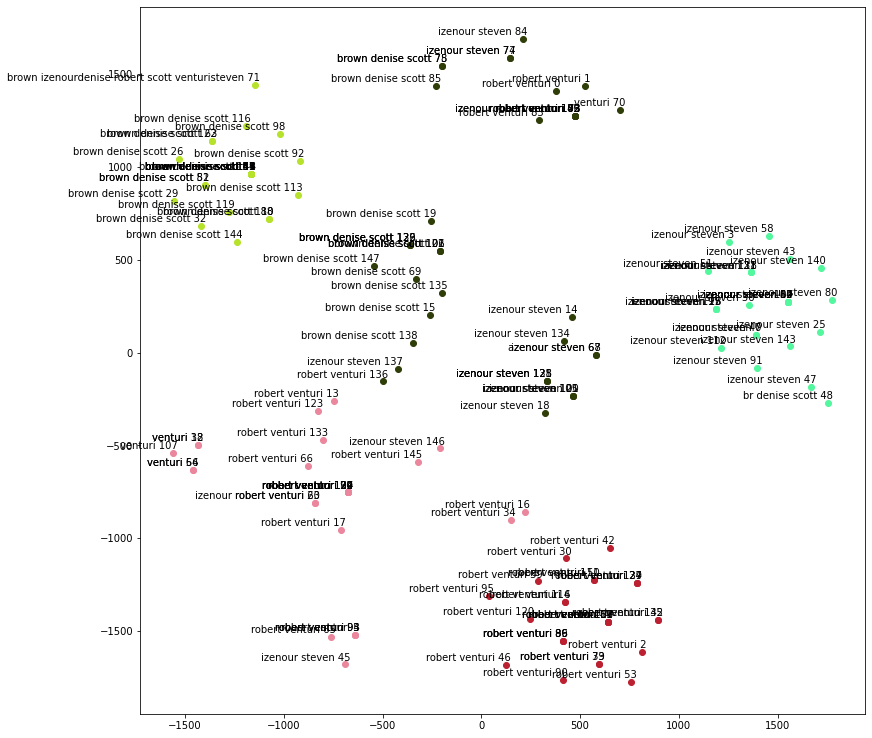

In [89]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 

for i in range(num_clusters):
    colorInit = 1 + i
    r, g, b = random_color(colorInit)
    selected_color = rgb2hex(r,g,b)
    block = blocks[i]
    for e in block:
        plt.scatter(x[e],y[e], c=selected_color)
        plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

41


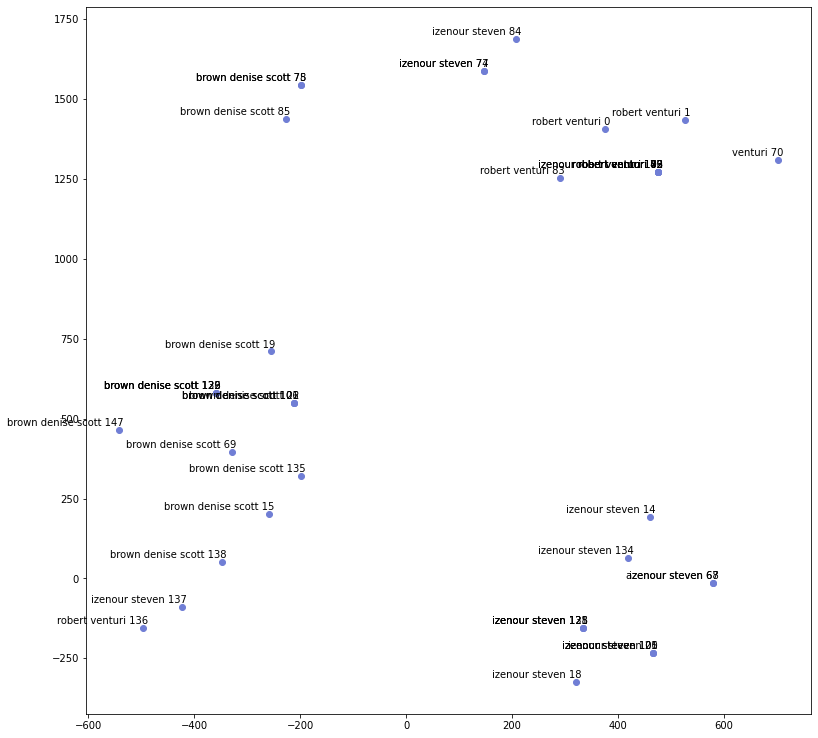

In [90]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 


r, g, b = random_color(1)
selected_color = rgb2hex(r,g,b)
block = blocks[0]
print(len(block))
for e in block:
    plt.scatter(x[e],y[e], c=selected_color)
    plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

28


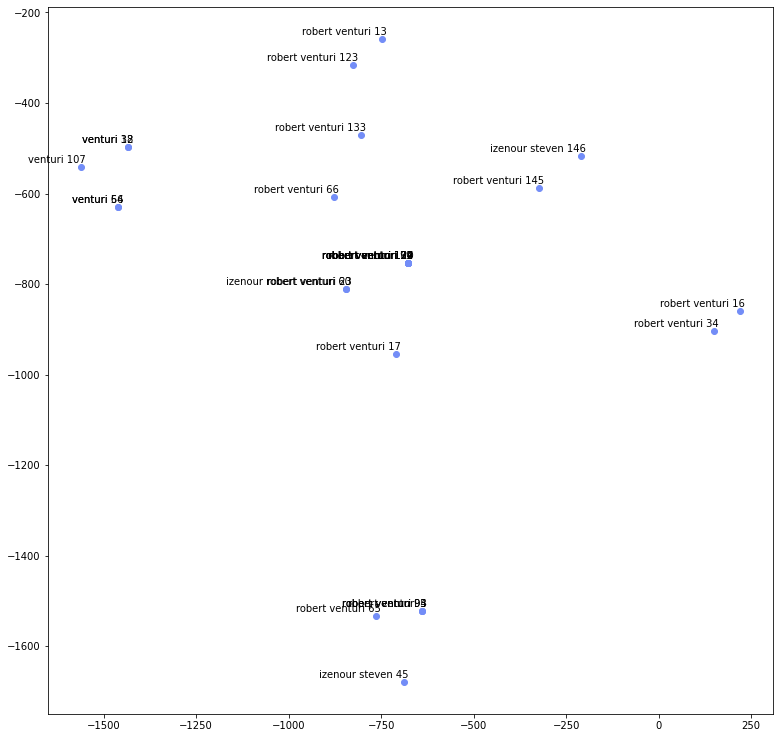

In [91]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 


r, g, b = random_color(1)
selected_color = rgb2hex(r,g,b)
block = blocks[1]
print(len(block))
for e in block:
    plt.scatter(x[e],y[e], c=selected_color)
    plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

26


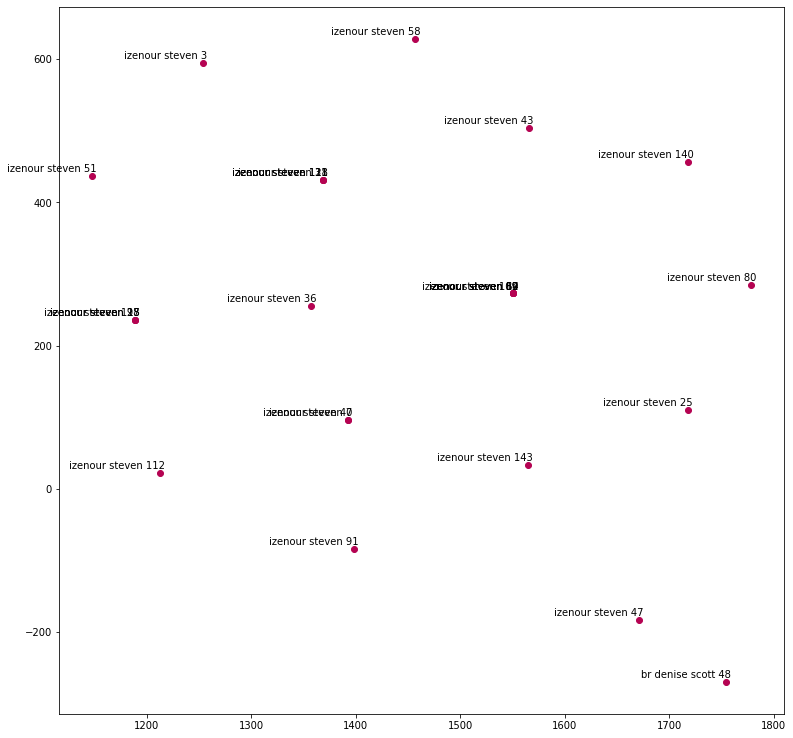

In [92]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 


r, g, b = random_color(1)
selected_color = rgb2hex(r,g,b)
block = blocks[2]
print(len(block))
for e in block:
    plt.scatter(x[e],y[e], c=selected_color)
    plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

28


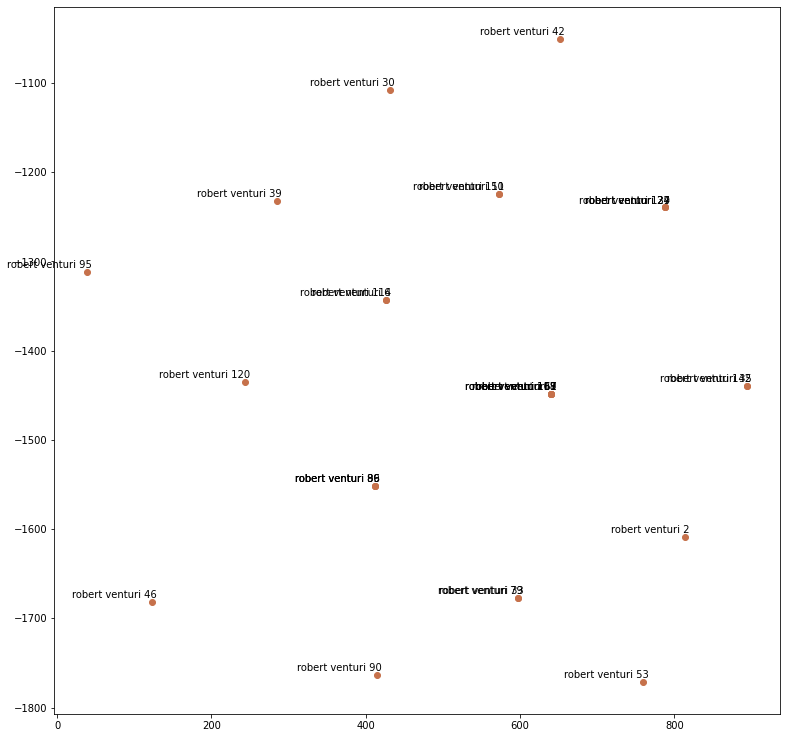

In [93]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 


r, g, b = random_color(1)
selected_color = rgb2hex(r,g,b)
block = blocks[3]
print(len(block))
for e in block:
    plt.scatter(x[e],y[e], c=selected_color)
    plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

25


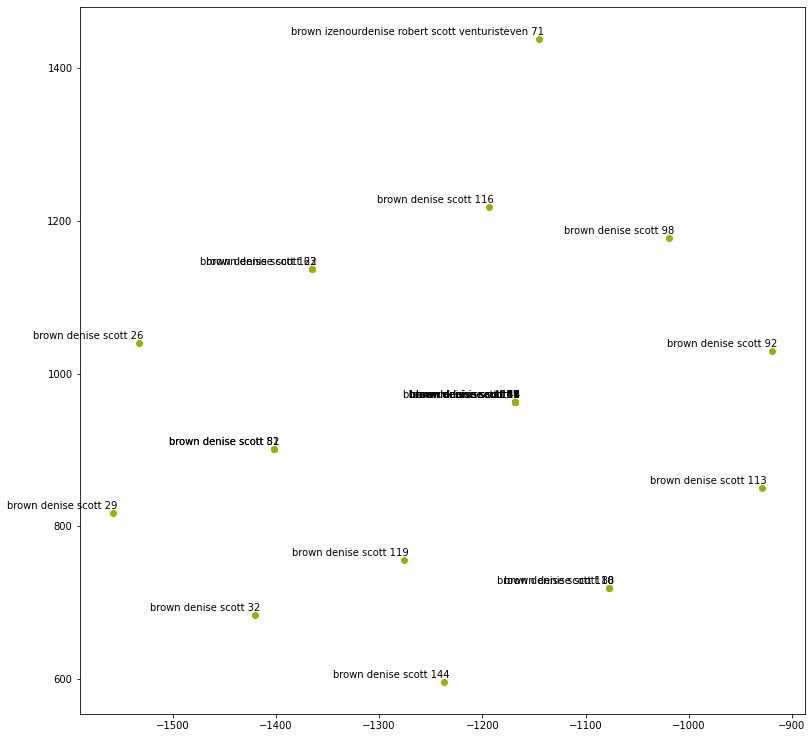

In [94]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 


r, g, b = random_color(1)
selected_color = rgb2hex(r,g,b)
block = blocks[4]
print(len(block))
for e in block:
    plt.scatter(x[e],y[e], c=selected_color)
    plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()